# STUDENT PERFORMANCE DATA SET PROJECT

## Contents

### 1-)Importing library
### 2-)Pre-processing
### 3-)Algorithms
#####    1--Naive Bayes
#####    2--Naive Bayes (with sklearn)
#####    3--Algorithms with K fold cross validation
######     -KNN
######     -Naive Bayes
######     -SVC
######     -Random Forest

# 1-) IMPORTING LIBRARIES

In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
df = pd.read_csv("../data/student-mat-firstversion.csv", sep=';')
df
#Firstly I imported the pandas library and then I read the comma separated excel file

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,letter_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,C
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,A
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,C
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,B


In [42]:
df.describe().T
#I showed some important values of the dataset

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [43]:
df.info()
#I showed info data type, column and row number, memory usage information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school          395 non-null object
sex             395 non-null object
age             395 non-null int64
address         395 non-null object
famsize         395 non-null object
Pstatus         395 non-null object
Medu            395 non-null int64
Fedu            395 non-null int64
Mjob            395 non-null object
Fjob            395 non-null object
reason          395 non-null object
guardian        395 non-null object
traveltime      395 non-null int64
studytime       395 non-null int64
failures        395 non-null int64
schoolsup       395 non-null object
famsup          395 non-null object
paid            395 non-null object
activities      395 non-null object
nursery         395 non-null object
higher          395 non-null object
internet        395 non-null object
romantic        395 non-null object
famrel          395 non-null int64
freetime        395 non-null int64
goo

# 2-) PRE-PROCESSING

# 1-Is there any missing value?

In [44]:
df.isnull().values.any() 

False

# 2-Variable Transformation

# One Hot Transformation

In [45]:
clmns = ['reason','Mjob','Fjob','guardian']
df2 = pd.concat([df, pd.get_dummies(df[clmns])], axis=1).drop(clmns, axis = 1)
df2
#I made one-hot transformation because 'reason', 'Mjob', 'Fjob', 'guardian' attributes have more than 2 variables
#In one-hot transformation, the values of the attributes are regenerated separately. I deleted the old values to avoid 
#confusion.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,0,0,0,0,1,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,0,0,0,0,1,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,1,0,0,0,0,1,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,1,0,0,0,0,1,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,0,1,0,0,0,1,0


# 0-1 Transformation

In [46]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
clms = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for i in clms:
    df2[i] = lbe.fit_transform(df2[i])
df2
#I convert 0-1 with the help of clms list structure and a loop

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,0,0,1,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,0,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,1,0,0,0,0,1,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,1,0,0,0,0,1,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,0,1,0,0,0,1,0


# 3-Is there any outlier data ?

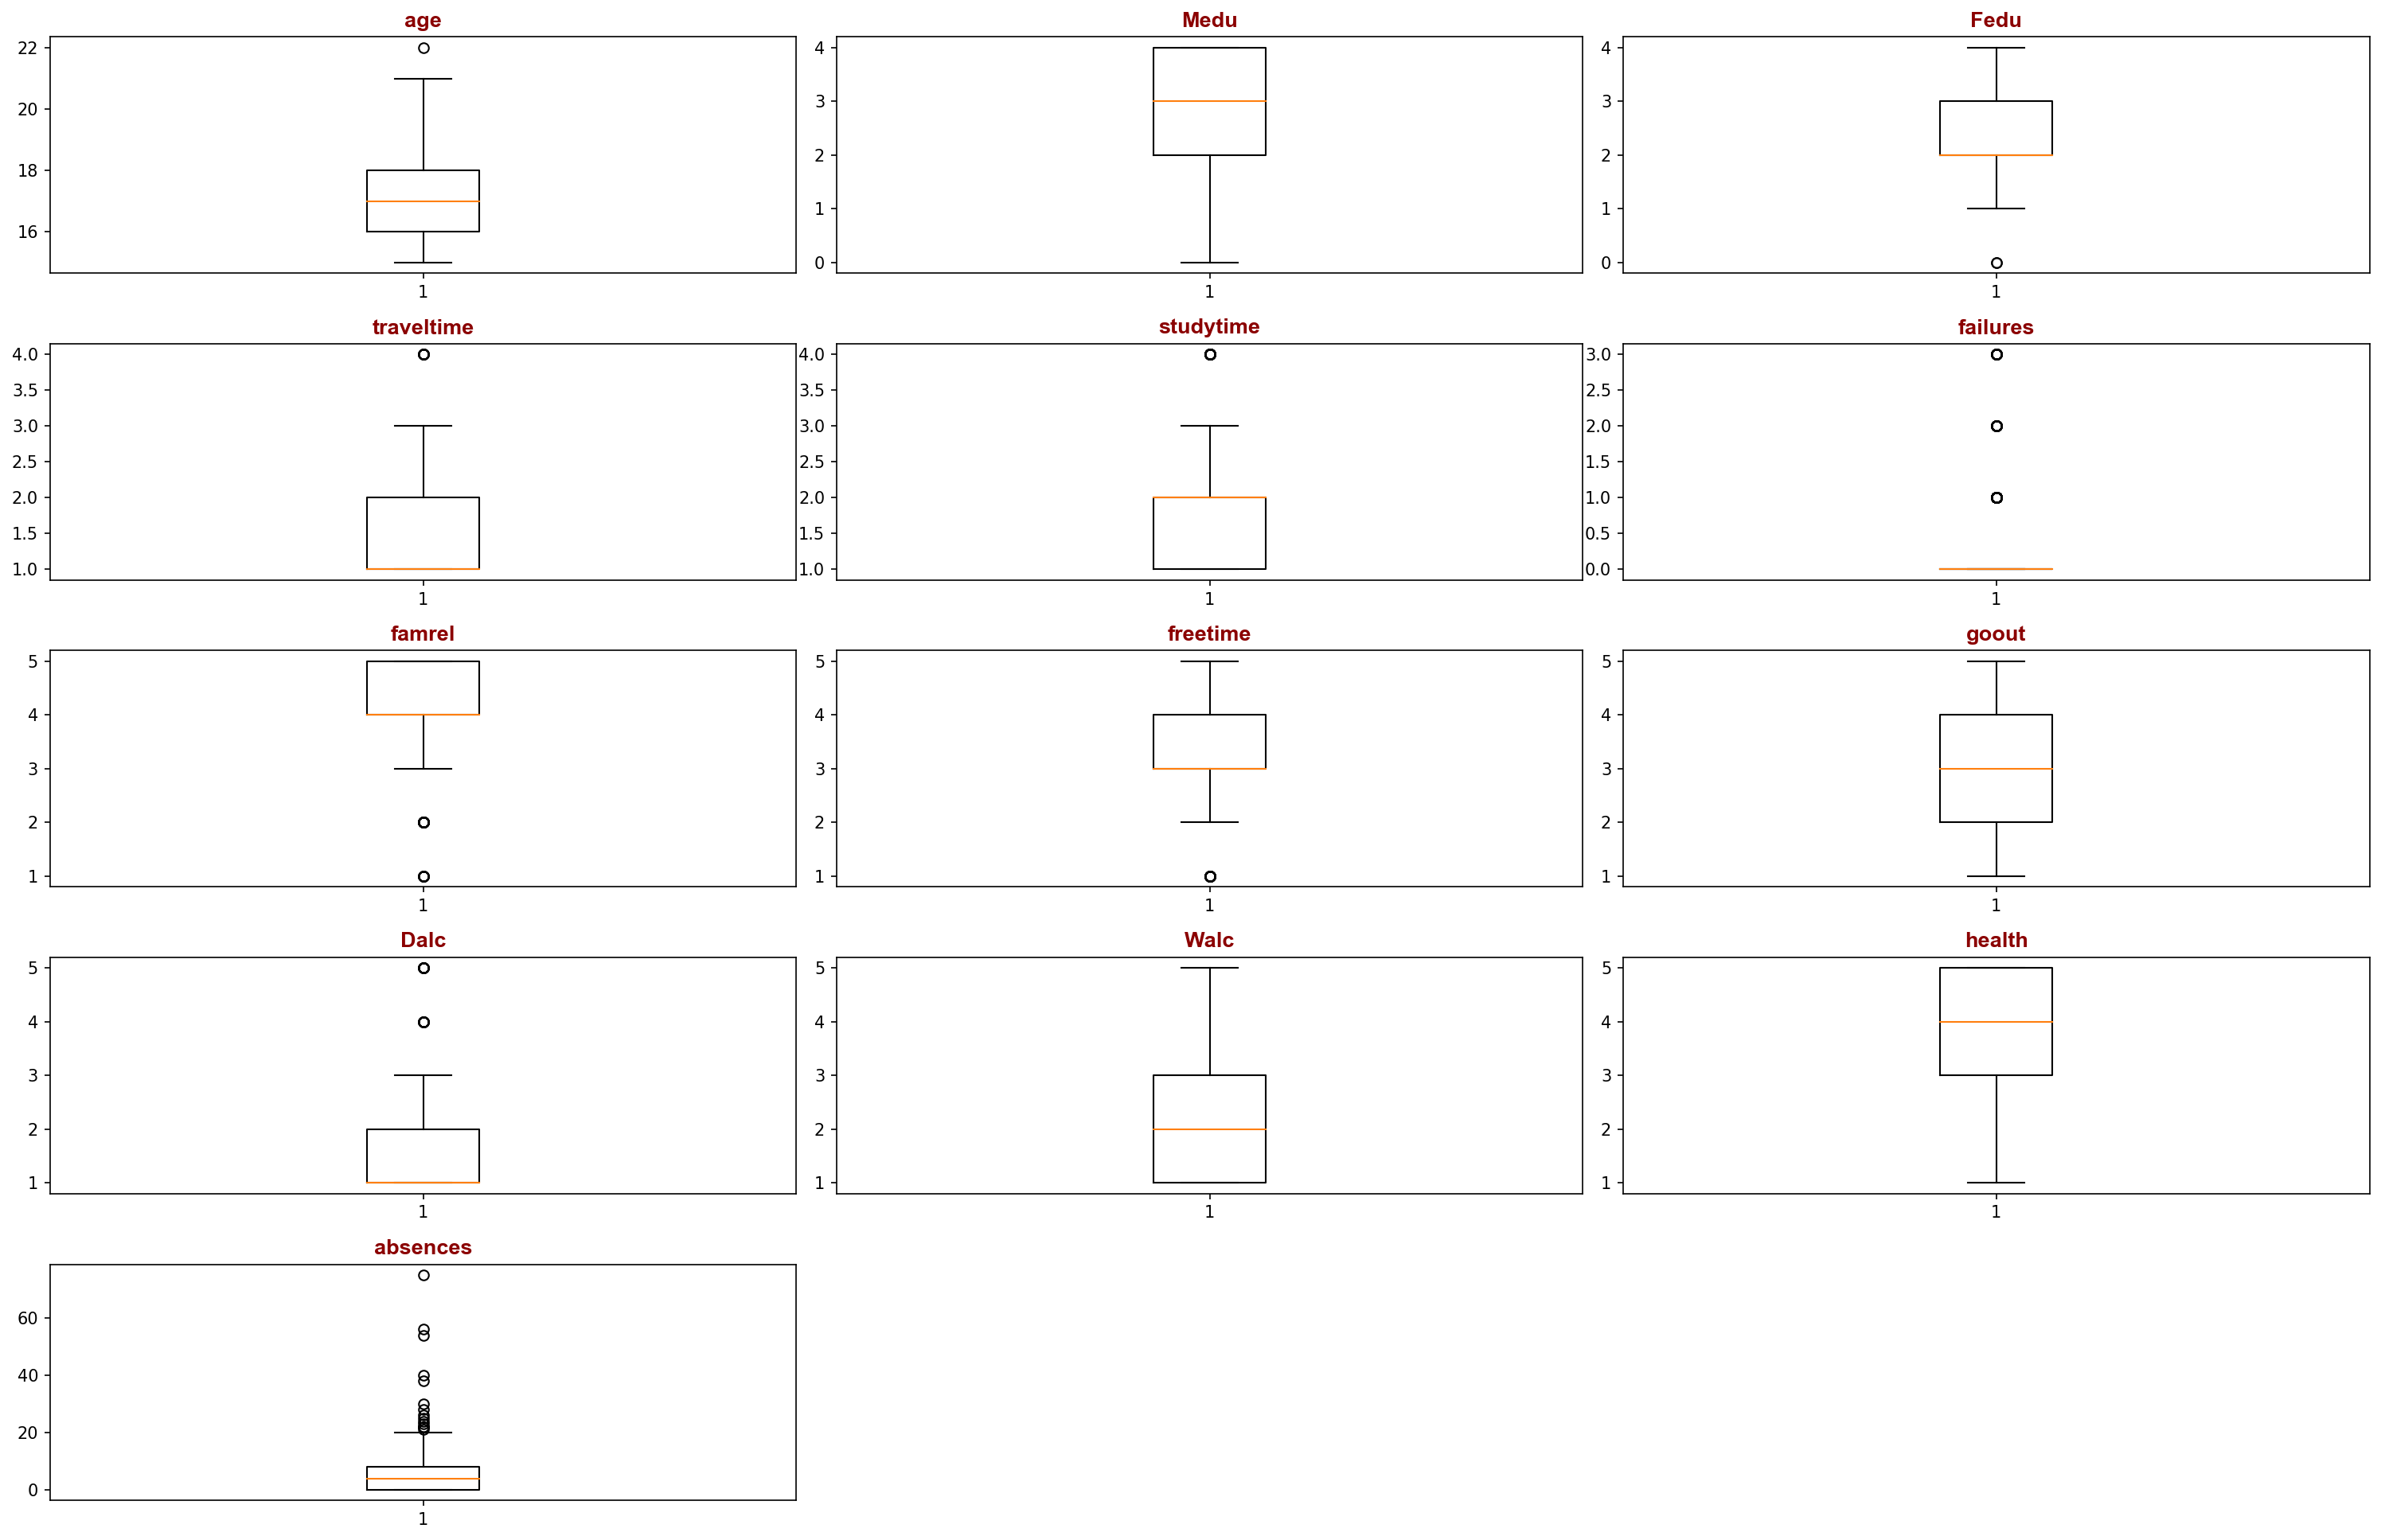

In [47]:
import matplotlib.pyplot as plt
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,13),dpi=150)
fill_list=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
for i,col in enumerate(fill_list):
    plt.subplot(5,3,i+1)
    plt.boxplot(col, data=df2)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()
#Let's visualize outlier data

# Suppression method

In [48]:
c = ['age','traveltime','studytime','failures','Dalc','absences']
for col in c :
    df2_col = df2[col]
    Q1 = df2_col.quantile(0.25) #first interquartile range
    Q3 = df2_col.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_col_higher = (df2_col > high_limit) #outlier data greater than the upper limit
    df2_col[outliers_col_higher] = high_limit 

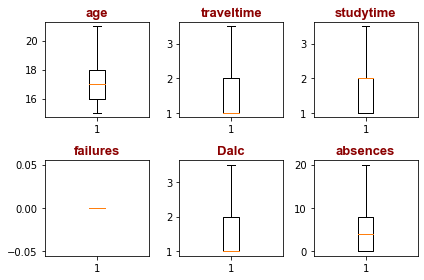

In [49]:
for i,col in enumerate(c):
    plt.subplot(2,3,i+1)
    plt.boxplot(col, data=df2)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()
#let's visualize new data

In [50]:
col = ['Fedu','famrel','freetime']
for c in col :
    df2_c = df2[c]
    Q1 = df2_c.quantile(0.25) #first interquartile range
    Q3 = df2_c.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_c_lower = (df2_c < low_limit) #outlier data greater than the upper limit
    df2_c[outliers_c_lower] = low_limit 

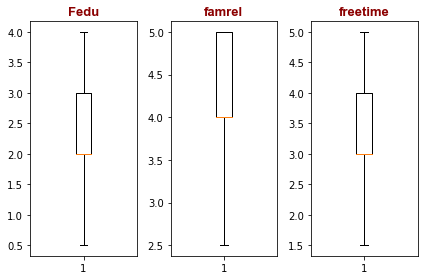

In [51]:
for i,colum in enumerate(col):
    plt.subplot(1,3,i+1)
    plt.boxplot(colum, data=df2)
    plt.title(colum,fontdict=baslik_font)
plt.tight_layout()
plt.show()
#let's visualize new data

# 3-) Algorithms

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [53]:
y = df2["letter_grade"]
x = df2.drop(["letter_grade"], axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    stratify=y)
#I have separated the data set as 70% train and 30% test

In [55]:
x_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
351,1,1,17,1,0,1,3,3.0,2.0,2.0,...,0,0,0,0,1,0,0,0,1,0
327,0,1,17,0,0,1,2,2.0,3.5,1.0,...,1,0,0,0,1,0,0,0,1,0
198,0,0,17,1,0,1,4,4.0,2.0,1.0,...,1,0,0,0,0,0,1,0,1,0
240,0,1,17,1,1,1,4,3.0,2.0,2.0,...,0,0,0,0,1,0,0,0,1,0
385,1,0,18,0,0,1,2,2.0,2.0,3.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,17,1,0,1,2,4.0,2.0,2.0,...,0,0,0,1,0,0,0,0,1,0
387,1,0,19,0,0,1,2,3.0,1.0,3.0,...,1,0,0,0,1,0,0,0,1,0
211,0,1,17,1,1,1,4,4.0,1.0,2.0,...,1,0,0,0,1,0,0,0,1,0
206,0,0,16,1,0,0,3,1.0,1.0,2.0,...,1,0,0,0,1,0,0,0,1,0


## 1- Naive Bayes 

In [56]:
Xtrain = pd.concat([x_train, y_train], axis=1)
Xtrain

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,letter_grade
150,0,1,18,1,1,1,1,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,D
322,0,0,17,0,1,1,2,2.0,1.0,3.0,...,0,0,0,0,1,0,0,1,0,B
131,0,0,15,1,0,1,1,1.0,3.0,1.0,...,0,0,0,1,0,0,0,1,0,D
171,0,1,16,1,0,1,1,0.5,2.0,2.0,...,0,0,0,1,0,0,0,1,0,A
245,0,1,16,1,0,1,2,1.0,3.0,1.0,...,0,0,0,1,0,0,0,1,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,16,1,0,1,3,2.0,2.0,3.0,...,0,0,0,1,0,0,0,1,0,B
43,0,1,15,1,0,1,2,2.0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,B
249,0,1,16,1,0,1,0,2.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,A
321,0,0,17,1,0,1,2,2.0,1.0,2.0,...,0,0,0,1,0,0,0,1,0,C


In [57]:
## assume Gaussian (Normal) Distribution 
## Bayes Theorem: Posterior = (Likelihood x Prior) / Evidence
## Bayes Theorem: p_C_x = (P_x_C x p_C) / p_x
Xtrain_A = Xtrain[Xtrain['letter_grade'] == 'A']
Xtrain_B = Xtrain[Xtrain['letter_grade'] == 'B']
Xtrain_C = Xtrain[Xtrain['letter_grade'] == 'C']
Xtrain_D = Xtrain[Xtrain['letter_grade'] == 'D']
## Calculate prior probabilities: p_C1, p_C2, p_C3, p_C4 - C1:A C2:B C3:C C4:D
p_C1 = Xtrain_A.shape[0] / Xtrain.shape[0]
print(p_C1)
p_C2 = Xtrain_B.shape[0] / Xtrain.shape[0]
print(p_C2)
p_C3 = Xtrain_C.shape[0] / Xtrain.shape[0]
print(p_C3)
p_C4 = Xtrain_D.shape[0] / Xtrain.shape[0]
print(p_C4)

0.18478260869565216
0.4855072463768116
0.2318840579710145
0.09782608695652174


In [58]:
m_C1 = Xtrain[Xtrain['letter_grade']== 'A'].iloc[:,0:46].mean()
std_C1 =Xtrain[Xtrain['letter_grade']== 'A'].iloc[:,0:46].std()
print(m_C1)
print(std_C1)
m_C2 = Xtrain[Xtrain['letter_grade']== 'B'].iloc[:,0:46].mean()
std_C2 =Xtrain[Xtrain['letter_grade']== 'B'].iloc[:,0:46].std()
print(m_C2)
print(std_C2)
m_C3 = Xtrain[Xtrain['letter_grade']== 'C'].iloc[:,0:46].mean()
std_C3 =Xtrain[Xtrain['letter_grade']== 'C'].iloc[:,0:46].std()
print(m_C3)
print(std_C3)
m_C4 = Xtrain[Xtrain['letter_grade']== 'D'].iloc[:,0:46].mean()
std_C4 =Xtrain[Xtrain['letter_grade']== 'D'].iloc[:,0:46].std()
print(m_C4)
print(std_C4)

school                0.098039
sex                   0.549020
age                  16.333333
address               0.823529
famsize               0.333333
Pstatus               0.901961
Medu                  3.176471
Fedu                  2.774510
traveltime            1.352941
studytime             2.166667
failures              0.000000
schoolsup             0.019608
famsup                0.529412
paid                  0.431373
activities            0.529412
nursery               0.843137
higher                1.000000
internet              0.941176
romantic              0.274510
famrel                4.029412
freetime              3.323529
goout                 2.882353
Dalc                  1.235294
Walc                  1.980392
health                3.568627
absences              3.627451
G1                   15.450980
G2                   15.784314
G3                   16.078431
reason_course         0.392157
reason_home           0.215686
reason_other          0.078431
reason_r

In [59]:
import numpy as np
X_test_arr = x_test.to_numpy()
import math
pred = []
for test in X_test_arr:
    
       
    p_x_C1 = (1 / ((2 * math.pi * std_C1**2)**0.5)) * 2.7182**(-1 * (test - m_C1)**2 / (2 * std_C1**2))
    ##print(p_x_C1)
    
    p_x_C2 = (1 / ((2 * math.pi * std_C2**2)**0.5)) * 2.7182**(-1 * (test - m_C2)**2 / (2 * std_C2**2))
    ##print(p_x_C2)

    p_x_C3 = (1 / ((2 * math.pi * std_C3**2)**0.5)) * 2.7182**(-1 * (test - m_C3)**2 / (2 * std_C3**2))
    ##print(p_x_C3)
    
    p_x_C4 = (1 / ((2 * math.pi * std_C4**2)**0.5)) * 2.7182**(-1 * (test - m_C4)**2 / (2 * std_C4**2))
    ##print(p_x_C4)
    
    ## Calculate evidence: p_x_C1 * p_C1 + p_x_C2 * p_C2 toplam olasılık .prod() içindeki tüm sayıları çarp

    p_x = p_x_C1.prod() * p_C1 + p_x_C2.prod() * p_C2 + p_x_C3.prod() * p_C3 + p_x_C4.prod() * p_C4
    p_x

    ## Calculate posterior probabilities olasılıklar çarpımlarıyla hesaplanıyor
    p_C1_x = p_x_C1.prod() * p_C1 / p_x
    p_C2_x = p_x_C2.prod() * p_C2 / p_x
    p_C3_x = p_x_C3.prod() * p_C3 / p_x
    p_C4_x = p_x_C4.prod() * p_C4 / p_x
    
    if(p_C1_x > p_C2_x):
        
        if(p_C1_x > p_C3_x):
            
            if(p_C1_x> p_C4_x):
                pred.append('A')
    if(p_C2_x > p_C1_x):
        
        if(p_C2_x > p_C3_x):
            
            if(p_C2_x> p_C4_x):
                pred.append('B')
    if(p_C3_x > p_C1_x):
        
        if(p_C3_x > p_C2_x):
            
            if(p_C3_x> p_C4_x):
                pred.append('C')
    if(p_C4_x > p_C1_x):
        
        if(p_C4_x > p_C2_x):
            
            if(p_C4_x> p_C3_x):
                pred.append('D')
print(pred)

['B', 'B', 'A', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'B', 'C', 'B', 'B', 'C', 'C', 'A', 'C', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'B', 'C', 'A', 'D', 'C', 'B', 'C', 'A', 'D', 'B', 'B', 'B', 'C', 'D', 'A', 'B', 'B', 'C', 'A', 'B', 'C', 'B', 'C', 'A', 'B', 'B', 'D', 'B', 'A', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'A', 'D', 'C', 'B', 'C', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'D', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'C', 'D', 'B', 'D', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'A', 'B', 'A', 'D', 'B', 'C', 'C', 'B', 'A', 'D', 'C', 'A', 'D', 'A', 'B', 'C', 'C', 'B', 'D', 'B', 'C', 'B']


In [60]:
#accuracy
r = 0
s = 0
for f, b in zip(pred, y_test):
    if(f == b):
        r += 1
    else:
        s+=1
print("Our accuracy",r/(r+s))

Our accuracy 0.8571428571428571


## 2- Naive Bayes With Sklearn

In [61]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_model
# I built the naive bayes model here.

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
nb_model.predict(x_test)[0:119]
#I'm performing the prediction process

array(['A', 'B', 'A', 'A', 'B', 'B', 'C', 'A', 'C', 'C', 'B', 'B', 'C',
       'B', 'B', 'C', 'C', 'A', 'C', 'C', 'C', 'B', 'A', 'A', 'C', 'B',
       'B', 'C', 'A', 'D', 'C', 'A', 'C', 'A', 'D', 'B', 'B', 'A', 'C',
       'D', 'A', 'B', 'B', 'C', 'A', 'B', 'C', 'B', 'C', 'A', 'B', 'A',
       'C', 'B', 'A', 'A', 'C', 'C', 'B', 'A', 'B', 'B', 'A', 'D', 'C',
       'B', 'C', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'C', 'A', 'B',
       'A', 'B', 'A', 'A', 'B', 'A', 'B', 'D', 'B', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'C', 'B', 'B', 'A', 'A', 'A', 'D', 'B', 'C', 'C',
       'B', 'A', 'C', 'C', 'A', 'D', 'A', 'B', 'C', 'C', 'B', 'D', 'B',
       'C', 'B'], dtype='<U1')

In [63]:
nb_model.predict_proba(x_test)[0:119]
#I found the probability values.left row are probabilities of 0. right row are probabilities of 1.

array([[9.96088403e-001, 3.91159742e-003, 1.33511596e-012,
        3.54160739e-061],
       [1.45327124e-009, 9.37798132e-001, 6.22018667e-002,
        1.30897978e-030],
       [1.00000000e+000, 3.44729369e-015, 1.93278127e-040,
        0.00000000e+000],
       [8.86619121e-001, 1.13380777e-001, 1.01638334e-007,
        5.55719072e-050],
       [3.00107578e-013, 9.82148726e-001, 1.78512738e-002,
        1.04248957e-032],
       [4.39918234e-007, 9.99999547e-001, 1.33875536e-008,
        5.30950448e-060],
       [8.83434767e-020, 7.69753732e-006, 9.99992302e-001,
        0.00000000e+000],
       [9.95463375e-001, 4.53662494e-003, 6.36271587e-013,
        1.11547832e-062],
       [2.56406525e-023, 1.65789545e-004, 9.99834210e-001,
        1.36869132e-025],
       [3.07831807e-013, 2.44666124e-003, 9.97553339e-001,
        2.30207327e-019],
       [1.19453988e-002, 9.88049888e-001, 4.71349261e-006,
        2.40516400e-039],
       [2.12816863e-011, 6.07776348e-001, 3.92223652e-001,
      

In [64]:
#If I want to calculate the test error:
y_pred = nb_model.predict(x_test)

In [65]:
accuracy_score(y_test, y_pred)
#I calculated the accuracy score

0.7899159663865546

# Algorithms With StratifiedKFold

In [66]:
from sklearn.model_selection import StratifiedKFold
Y= df2["letter_grade"]
X = df2.drop(["letter_grade"], axis=1)
#I imported libraries

## 1- KNN 

In [67]:
#I create an object to apply knn. k fold cross validation I keep every iteration in a list where it will be applied 5 times.
knn = KNeighborsClassifier()
accuracy_1 = []
skf1 = StratifiedKFold(n_splits = 5,random_state = None)
skf1.get_n_splits(X,Y)
for train_index, test_index in skf1.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    knn_model = knn.fit(X_train, Y_train)
    prediction_1 =knn.predict(X_test)
    score_1 = accuracy_score(Y_test,prediction_1)
    accuracy_1.append(score_1)
    
print(accuracy_1) 

[0.8271604938271605, 0.8875, 0.8987341772151899, 0.8974358974358975, 0.8701298701298701]


In [68]:
#I average the results
total1=0
kmean1=0
for b in range(0,len(accuracy_1)):
    total1+=accuracy_1[b]
    kmean1=(total1)/len(accuracy_1)
      

print('Ortalama : ',kmean1)

Ortalama :  0.8761920877216236


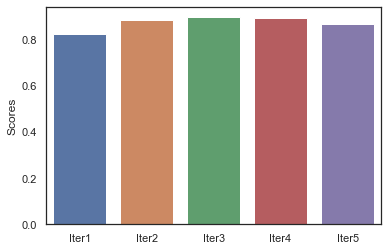

In [69]:
#I visualized the results of 5 iterations
scores = pd.DataFrame(accuracy_1,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

### KNN Model Tuning

In [70]:
#In this section, I apply the algorithm with values from 1 to 11. I find out which value 
#of n will give the best result. And I find the success rate of this best result.

In [71]:
knn_params = {"n_neighbors": np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.8836477987421384
En iyi parametreler: {'n_neighbors': 8}


In [73]:
knn = KNeighborsClassifier(8)
knn_tuned = knn.fit(X_train, Y_train)

In [74]:
knn_tuned.score(X_test, Y_test)

0.8961038961038961

In [75]:
y_pred = knn_tuned.predict(X_test)

In [76]:
accuracy_score(Y_test, y_pred)

0.8961038961038961

## 2- Naive Bayes 

In [77]:
#I create an object to apply bayes. k fold cross validation I keep every iteration in a list where it will be applied 5 times.
nb2 = GaussianNB()
accuracy_2 = []

skf2 = StratifiedKFold(n_splits = 5,random_state = None)
skf2.get_n_splits(X,Y)
for train_index, test_index in skf2.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    nb2_model = nb2.fit(X_train, Y_train)
    prediction_2 =nb2.predict(X_test)
    score_2 = accuracy_score(Y_test,prediction_2)
    accuracy_2.append(score_2)
    
print(accuracy_2)   

[0.8024691358024691, 0.7625, 0.8354430379746836, 0.7307692307692307, 0.8311688311688312]


In [78]:
#I average the results
total2=0
kmean2=0
for a in range(0,len(accuracy_2)):
    total2+=accuracy_2[a]
    kmean2=(total2)/len(accuracy_2)
      

print('Ortalama : ',kmean2)

Ortalama :  0.792470047143043


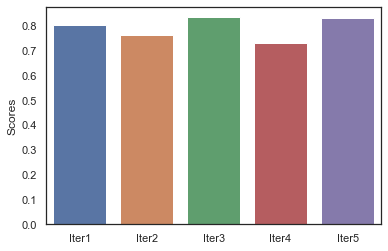

In [79]:
#I visualized the results of 5 iterations
scores = pd.DataFrame(accuracy_2,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

## 3- SVM (Support Vector Machine ) 

In [80]:
#I create an object to apply svm. k fold cross validation I keep every iteration in a list where it will be applied 5 times.
svm_model = SVC(kernel = "linear")

accuracy_3 = []

skf3 = StratifiedKFold(n_splits = 5,random_state = None)
skf3.get_n_splits(X,Y)
for train_index, test_index in skf3.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    svm_model = SVC(kernel = "linear").fit(X_train, Y_train)
    # I did the model building process
    prediction_3 =svm_model.predict(X_test)
    score_3 = accuracy_score(Y_test,prediction_3)
    accuracy_3.append(score_3)
    
print(accuracy_3) 

[0.9876543209876543, 1.0, 0.9873417721518988, 1.0, 1.0]


In [81]:
#I average the results
total3=0
kmean3=0
for d in range(0,len(accuracy_3)):
    total3+=accuracy_3[d]
    kmean3=(total3)/len(accuracy_3)
      

print('Ortalama : ',kmean3)

Ortalama :  0.9949992186279106


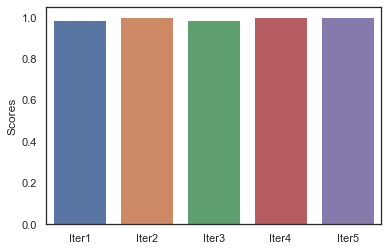

In [82]:
#I visualized the results of 5 iterations
scores = pd.DataFrame(accuracy_3,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

### SVM Model Tuning

In [83]:
#In this section I apply the algorithm with values from 1 to 10. I find out which C value 
#will give the best result. And I find the success rate of this best result.

In [84]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 5, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [85]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [86]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, Y_train)

In [87]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(Y_test, y_pred)

1.0

## 4-Random Forest

In [88]:
#I create an object to apply knn. k fold cross validation I keep every iteration in a list where it will be applied 5 times.
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
accuracy_4 = []

In [89]:
skf4 = StratifiedKFold(n_splits = 5,random_state = None)
skf4.get_n_splits(X,Y)
for train_index, test_index in skf3.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    rf_model = RandomForestClassifier().fit(X_train, Y_train)
    # I did the model building process
    prediction_4 =rf_model.predict(X_test)
    score_4 = accuracy_score(Y_test,prediction_4)
    accuracy_4.append(score_4)
    
print(accuracy_4) 

[0.9382716049382716, 0.95, 0.9113924050632911, 0.8974358974358975, 0.8961038961038961]


In [90]:
#I average the results
total4=0
kmean4=0
for h in range(0,len(accuracy_4)):
    total4+=accuracy_4[h]
    kmean4=(total4)/len(accuracy_4)
      

print('Ortalama : ',kmean4)

Ortalama :  0.9186407607082712


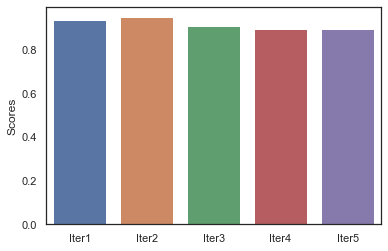

In [91]:
#I visualized the results of 5 iterations
scores = pd.DataFrame(accuracy_4,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

### Random Forest Model Tuning

In [92]:
#I applied different states of values "max_depth", "max_features", "n_estimators", "min_samples_split". 
#I found the best results of these values.

In [93]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [95]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [96]:
rf_cv_model.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   34.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [97]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [98]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(Y_test, y_pred)

0.987012987012987

In [100]:
#I created a chart showing which attribute values are important.

In [101]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

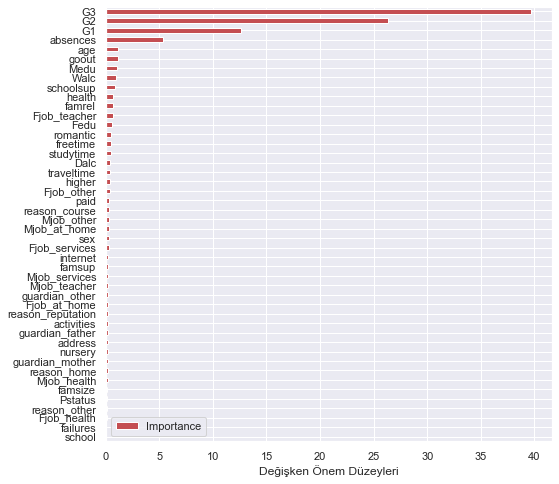

In [102]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r",figsize=(8,8))

plt.xlabel("Değişken Önem Düzeyleri")

# Evaluation

In [103]:
#In the model tuning section, I found the best results of the algorithms. Here I evaluated the best results of each algorithm.
modeller = [
    knn_tuned,
    nb2_model,
    svc_tuned,
    rf_tuned]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(Y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 89.6104%
----------------------------
GaussianNB:
Accuracy: 83.1169%
----------------------------
SVC:
Accuracy: 100.0000%
----------------------------
RandomForestClassifier:
Accuracy: 98.7013%


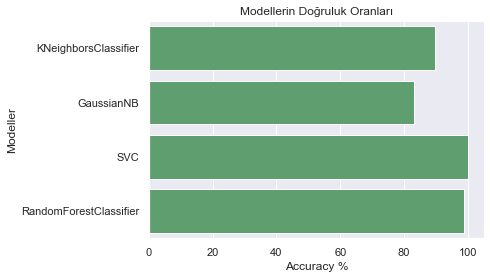

In [104]:
#In the model tuning section, I found the best results of the algorithms, where I visualized the best results of each algorithm.
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(Y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="g")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

In [ ]:
#Without G1,G2,G3 Attribute Evalution

In [105]:
df3 = df2.copy()

In [106]:
df3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4.0,2.0,2.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,17,1,0,1,1,1.0,1.0,2.0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,15,1,1,1,1,1.0,1.0,2.0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2.0,1.0,3.0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3.0,1.0,2.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,1
391,1,1,17,1,1,1,3,1.0,2.0,1.0,...,1,0,0,0,0,1,0,0,1,0
392,1,1,21,0,0,1,1,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
393,1,1,18,0,1,1,3,2.0,3.0,1.0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
#The most accurate result is the g3 grade, because it was determined according to the letter_grade final grades.

In [107]:
columns = ['G3']
df3.drop(columns,inplace = True,axis=1)

In [108]:
df3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'letter_grade', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [109]:
B= df3["letter_grade"]
A = df3.drop(["letter_grade"], axis=1)
#I imported libraries

In [112]:
#I create an object to apply knn. k fold cross validation I keep every iteration in a list where it will be applied 5 times.
knn3 = KNeighborsClassifier()
accuracy_1_2 = []
skf1_1 = StratifiedKFold(n_splits = 5,random_state = None)
skf1_1.get_n_splits(A,B)
for train_index, test_index in skf1_1.split(A,B):
    A_train, A_test = A.iloc[train_index], A.iloc[test_index]
    B_train, B_test = B.iloc[train_index], B.iloc[test_index]
    
    knn3_model = knn3.fit(A_train, B_train)
    prediction_1_2 =knn3.predict(A_test)
    score_1_2 = accuracy_score(B_test,prediction_1_2)
    accuracy_1_2.append(score_1_2)
    
print(accuracy_1_2) 

[0.4444444444444444, 0.45, 0.4177215189873418, 0.46153846153846156, 0.4155844155844156]


In [113]:
#I average the results
total1_1=0
kmean1_1=0
for b in range(0,len(accuracy_1_2)):
    total1_1+=accuracy_1_2[b]
    kmean1_1=(total1_1)/len(accuracy_1_2)
      

print('Ortalama : ',kmean1_1)

Ortalama :  0.4378577681109327


In [114]:
#I create an object to apply knn. k fold cross validation I keep every iteration in a list where it will be applied 5 times.
nb2_2 = GaussianNB()
accuracy_2_2 = []
skf1_2 = StratifiedKFold(n_splits = 5,random_state = None)
skf1_2.get_n_splits(A,B)
for train_index, test_index in skf1_2.split(A,B):
    A_train, A_test = A.iloc[train_index], A.iloc[test_index]
    B_train, B_test = B.iloc[train_index], B.iloc[test_index]
    
    nb2_2_model = nb2_2.fit(A_train, B_train)
    prediction_2_2 =nb2_2.predict(A_test)
    score_2_2 = accuracy_score(B_test,prediction_2_2)
    accuracy_2_2.append(score_2_2)
    
print(accuracy_2_2) 

[0.2345679012345679, 0.3875, 0.31645569620253167, 0.24358974358974358, 0.11688311688311688]


In [115]:
#I average the results
total2_1=0
kmean2_1=0
for b in range(0,len(accuracy_2_2)):
    total2_1+=accuracy_2_2[b]
    kmean2_1=(total2_1)/len(accuracy_2_2)
      

print('Ortalama : ',kmean2_1)

Ortalama :  0.259799291581992


In [118]:
svm2 = SVC(kernel = "linear")

accuracy_3_2 = []
skf1_3 = StratifiedKFold(n_splits = 5,random_state = None)
skf1_3.get_n_splits(A,B)
for train_index, test_index in skf1_3.split(A,B):
    A_train, A_test = A.iloc[train_index], A.iloc[test_index]
    B_train, B_test = B.iloc[train_index], B.iloc[test_index]
    
    svm2 = svm2.fit(A_train, B_train)
    prediction_3_2 =svm2.predict(A_test)
    score_3_2 = accuracy_score(B_test,prediction_3_2)
    accuracy_3_2.append(score_3_2)
    
print(accuracy_3_2) 

[0.4444444444444444, 0.6125, 0.4810126582278481, 0.4230769230769231, 0.33766233766233766]


In [119]:
#I average the results
total3_2=0
kmean3_2=0
for b in range(0,len(accuracy_3_2)):
    total3_2+=accuracy_3_2[b]
    kmean3_2=(total3_2)/len(accuracy_3_2)
      

print('Ortalama : ',kmean3_2)

Ortalama :  0.4597392726823107


In [120]:
rf2 = RandomForestClassifier()
accuracy_4_2 = []
skf1_4 = StratifiedKFold(n_splits = 5,random_state = None)
skf1_4.get_n_splits(A,B)
for train_index, test_index in skf1_4.split(A,B):
    A_train, A_test = A.iloc[train_index], A.iloc[test_index]
    B_train, B_test = B.iloc[train_index], B.iloc[test_index]
    
    rf2 = rf2.fit(A_train, B_train)
    prediction_4_2 =rf2.predict(A_test)
    score_4_2 = accuracy_score(B_test,prediction_4_2)
    accuracy_4_2.append(score_4_2)
    
print(accuracy_4_2) 

[0.3950617283950617, 0.4625, 0.4050632911392405, 0.44871794871794873, 0.4805194805194805]


In [121]:
#I average the results
total4_2=0
kmean4_2=0
for b in range(0,len(accuracy_4_2)):
    total4_2+=accuracy_4_2[b]
    kmean4_2=(total4_2)/len(accuracy_4_2)
      

print('Ortalama : ',kmean4_2)

Ortalama :  0.4383724897543463
